In [136]:
library(SPEI)

## Load some test data for calculating SPEI

In [259]:
# load data from SPEI package
data(wichita)

In [260]:
# Columns are: Year, Month, Precip, Mean Daily Max T, Mean Daily Min T, Mean T, Mean wind speed, Mean sun hours, Mean Cloud cover
head(wichita,5)

YEAR,MONTH,PRCP,TMAX,TMIN,TMED,AWND,TSUN,ACSH
1980,1,46.3,4.16,-4.91,-0.38,NA,3.96,76.45
1980,2,20.7,3.04,-7.33,-2.14,NA,5.75,68.28
1980,3,101.3,10.96,-0.45,5.26,NA,7.24,59.03
1980,4,27.2,19.24,5.48,12.36,NA,9.28,55.67
1980,5,67.5,23.58,11.33,17.46,NA,10.01,65.81


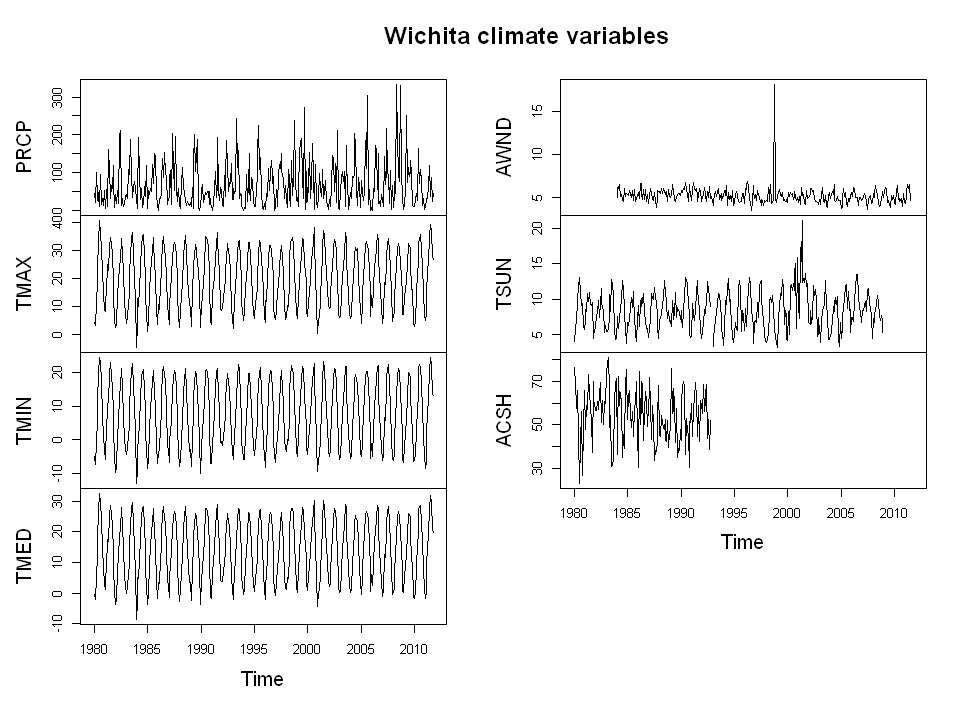

In [261]:
wichita_climate <- ts(wichita[,-c(1,2)], end=c(2011,10), frequency=12) 
plot(wichita_climate,main="Wichita climate variables") 

## Calculating Standardized Precipitation Evapotranspiration Index (SPEI)
SPEI is a climatic water balance calculation that is the difference between precipitation (P) and either Reference Evapotranspiration (ET<sub>0</sub>) or Potential Evapotranspiration (PET). Reference Evapotranspiration (ET<sub>0</sub>) is the amount of evaporation and transpiration from a reference crop of grass that is well-watered (in other words, is not water-limited). PET is the amount of evaporation and transpiration from a surface with unlimited water (like a lake). Both ET<sub>0</sub> and PET are measures of atmospheric evaporative demand and are generally considered equivalent. While P is measured directly, ET<sub>0</sub> and PET must be calculated.

## Choice of Evapotranspiration (ET<sub>0</sub> or PET) Calculation
a) <b>Thornthwaite PET:</b> Uses mean daily temperature and latitude. Pros: Doesn't require much data. Cons: Underestimates PET in arid and semiarid regions, overestimates PET in humid equatorial and tropical regions, overestimates PET over the last decades due to increasing air temperatures.   
b) <b>Penman-Monteith ET<sub>0</sub>:</b> Uses solar radiation, temperature, wind speed, and relative humidity. Pros: More accurate estimates of ET<sub>0</sub>. Cons: Requires a lot of data that aren't routinely measured.   
c) <b>Hargreaves ET<sub>0</sub>:</b> Uses daily minimum and maximum temperature. Pros: Doesn't require much data, at monthly and annual timescales is very similar to Penman-Monteith and to observations. Cons: Not quite as accurate as Penman-Monteith.   

## Calculate Evapotranspiration and Climatic Water Balance

In [262]:
# Thornthwaite
wichita$PETtt <- thornthwaite(wichita$TMED, lat=37.6475) 
wichita$BALtt <- wichita$PRCP-wichita$PETtt 

In [263]:
# Hargreaves
wichita$PEThg <- hargreaves(wichita$TMIN, wichita$TMAX,lat=37.6475) 
wichita$BALhg <- wichita$PRCP-wichita$PEThg 

In [264]:
# Penman-Monteith
wichita$PETpm <- penman(wichita$TMIN,wichita$TMAX,wichita$AWND,tsun=wichita$TSUN,lat=37.6475,z=402.6,na.rm=TRUE)
wichita$BALpm <- wichita$PRCP-wichita$PETpm 

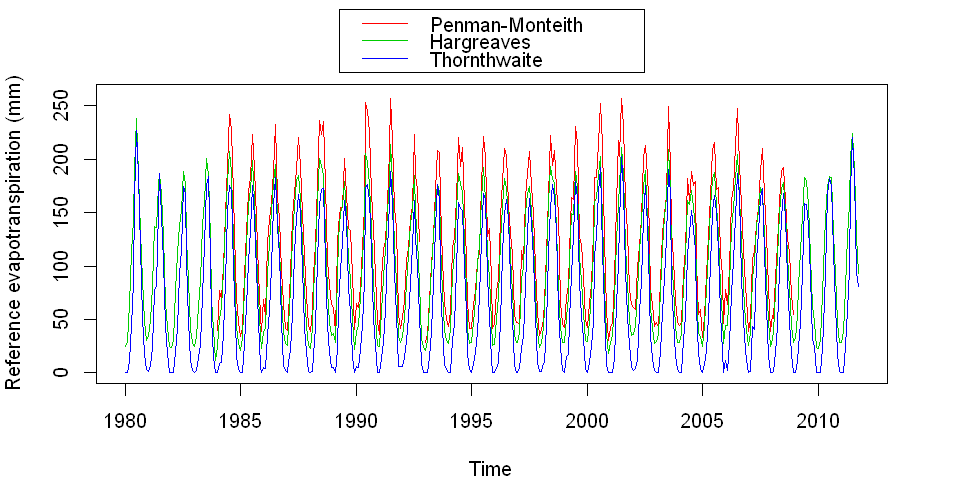

In [265]:
# Compare three Evapotranspiration calculations
wichita_ET <- ts(wichita[,-c(1:9)], end=c(2011,10), frequency=12) 
par(mar = c(4, 4, 3.5, 3),xpd=TRUE)
options(repr.plot.width=8, repr.plot.height=4)
plot(wichita_ET[,'PETpm'],col=2,ylab="Reference evapotranspiration (mm)",ylim = c(0, 260))
lines(wichita_ET[,'PEThg'],col=3)
lines(wichita_ET[,'PETtt'],col=4)
legend("top", inset=c(0,-0.25), c("Penman-Monteith", "Hargreaves", "Thornthwaite"), lty = 1, col = 2:4, y.intersp=1.5)

There are obvious differences between the three methods. At this site, Thornthwaite gives the lowest values for ET and Penman-Monteith gives the highest. 

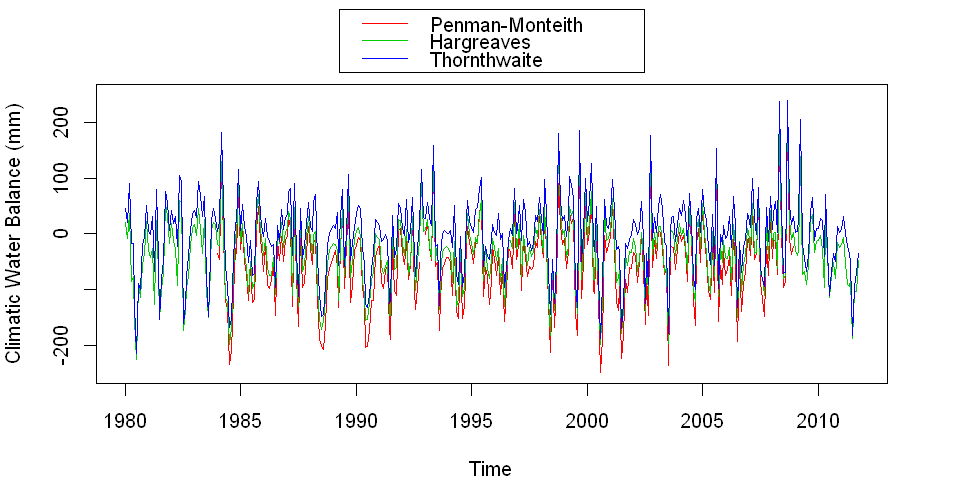

In [266]:
# Compare three Water Balance calculations
par(mar = c(4, 4, 3.5, 3),xpd=TRUE)
plot(wichita_ET[,'BALpm'],col=2,ylab="Climatic Water Balance (mm)",ylim = c(-250, 250))
lines(wichita_ET[,'BALhg'],col=3)
lines(wichita_ET[,'BALtt'],col=4)
legend("top", inset=c(0,-0.25), c("Penman-Monteith", "Hargreaves", "Thornthwaite"), lty = 1, col = 2:4, y.intersp=1.5)

As expected given the differences in ET among the three methods, the P-ET (climatic water balance) values are lowest for the Penman-Monteith and highest for the Thornthwaite. The wiggles are all similar, though.

## Calculate SPEI
SPEI is multi-scalar, meaning it can be calculated for different time windows. (This contrasts with the PDSI, which is not multi-scalar and is an average of ~ 12 months). The examples below are for 1-month and 12-month windows. The CSIC group in Spain provides instrumental SPEI on timescales of 1 month to 48 months (https://spei.csic.es/database.html).

## SPEI using Thornthwaite

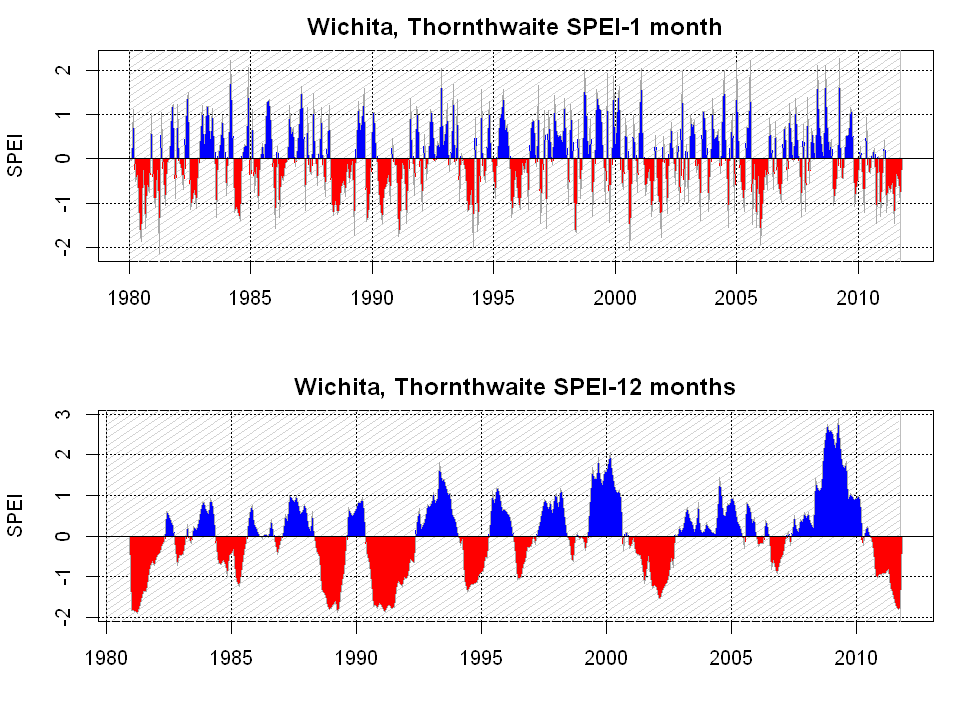

In [286]:
# One and twelve-months SPEI using Thornthwaite
spei1tt <- spei(ts(wichita[,'BALtt'], freq=12, start=c(1980,1)), 1,ref.start=c(1980,1), ref.end=c(2011,10))
spei12tt <- spei(ts(wichita[,'BALtt'], freq=12, start=c(1980,1)), 12,ref.start=c(1980,1), ref.end=c(2011,10)) 
par(mfrow=c(2,1)) 
options(repr.plot.width=8, repr.plot.height=6)
plot(spei1tt, main='Wichita, Thornthwaite SPEI-1 month') 
plot(spei12tt, main='Wichita, Thornthwaite SPEI-12 months') 

## SPEI using Hargreaves ET<sub>0</sub>

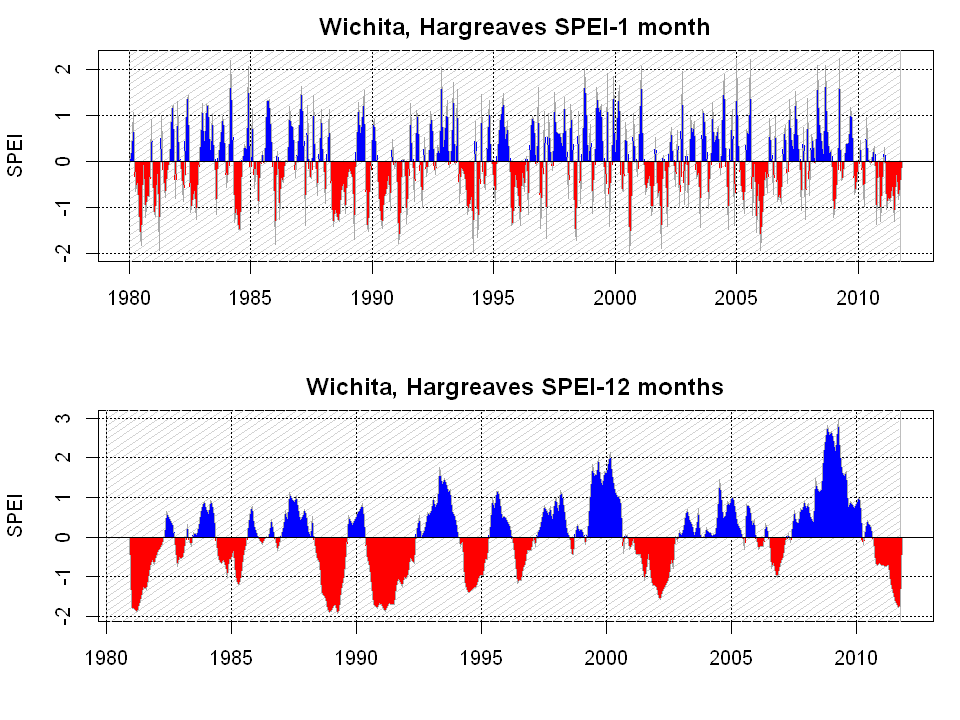

In [287]:
# One and twelve-months SPEI 
spei1hg <- spei(ts(wichita[,'BALhg'], freq=12, start=c(1980,1)), 1,ref.start=c(1980,1), ref.end=c(2011,10))
spei12hg <- spei(ts(wichita[,'BALhg'], freq=12, start=c(1980,1)), 12,ref.start=c(1980,1), ref.end=c(2011,10)) 
par(mfrow=c(2,1)) 
plot(spei1hg, main='Wichita, Hargreaves SPEI-1 month') 
plot(spei12hg, main='Wichita, Hargreaves SPEI-12 months') 

## SPEI using Penman-Monteith ET<sub>0</sub>

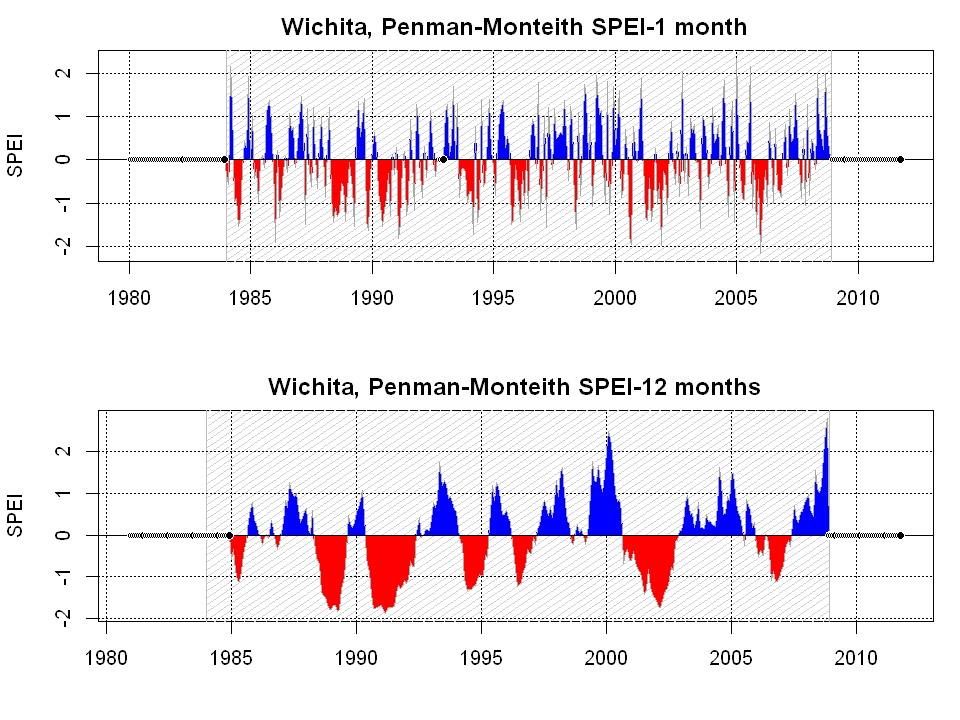

In [289]:
# One and twelve-months SPEI 
spei1pm <- spei(ts(wichita[,'BALpm'], freq=12, start=c(1980,1)), 1,ref.start=c(1984,1), ref.end=c(2008,12),na.rm=TRUE)
spei12pm <- spei(ts(wichita[,'BALpm'], freq=12, start=c(1980,1)), 12,ref.start=c(1984,1), ref.end=c(2008,12),na.rm=TRUE) 
par(mfrow=c(2,1)) 
spei1pm$fitted[is.na(spei1pm$fitted)] <- 0  # change NA to zero for plotting purposes
spei12pm$fitted[1:60] <- 0 # change NA to zero for plotting purposes
spei12pm$fitted[348:382] <- 0 # change NA to zero for plotting purposes
plot(spei1pm, main='Wichita, Penman-Monteith SPEI-1 month') 
plot(spei12pm, main='Wichita, Penman-Monteith SPEI-12 months') 

In this case, the choice of ET calculation doesn't have a huge impact on the calculated SPEI (at least visually). The ET and P-ET values for each method (Thornthwaite, Hargeaves, Penman-Monteith) were offset from another another, but the standardization into SPEI removed those offsets. The diagonal lines in the plots above show the reference period. Since there is more missing data in the Penman-Monteith P-ET, the reference period is shorter. The difference in reference period doesn't appear to have a large impact in this case (see more about reference period below).

## Nuts and bolts of turning P-ET (Climatic water balance) into SPEI
Behind the scenes, there are a few choices that need to be made when turning P-ET (mm/month) into SPEI (standard deviation units). These include:  

a) Reference period  
b) Kernel for averaging multiple months  
c) Probability distribution for the P-ET values and the method of fitting this distribution to the values. 

For (c), Begueira et al. 2014 (https://doi.org/10.1002/joc.3887) concluded that the log-Logistic probability distribution and the unbiased probability weighted moment method are best. Once this distribution is fit, the P-ET values can be normalized (transformed to a normal distribution with mean 0 and standard deviation 1). Having all SPEI values conform to a standard normal distribution allows SPEI to be compared across different regions and across different temporal scales (e.g., 1 month SPEI vs 12 month SPEI).

Just for kicks, the log-logistic distribution looks like the following, data values are on the x-axis and probability densities are on the y-axis. The distribution-fitting process determines which of these curves best fit the P-ET data, with the curves each defined by the scale parameter $\alpha$ and the shape parameter $\beta$ (in this example, $\alpha$ = 1 and different $\beta$ are shown by the different colored lines). Once the parameters are determined, the data can be transformed to be normally distributed.
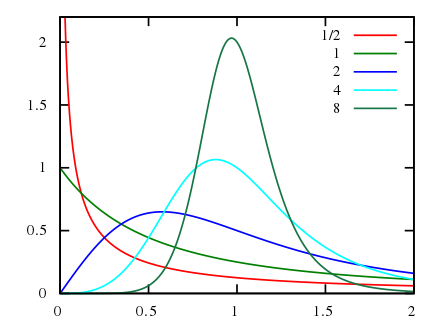
The probability densities (y values) in the figure above are calculated as: 

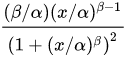

## Choice of reference period
Since the SPEI is a standardized measure, it is necessary to choose the reference period (the period for which mean = 0 and standard deviation = 1). Often, the reference period is the entire length of record. This is the default in the SPEI R package and also for the SPEI database produced by the CSIC group. However, that group uses a stable reference period of 1950-2010 for their near real-time drought monitor. When the reference period of the instrumental data is stable and doesn't change, blending with paleo is done just once. If the reference period for the instrumental data changes, the blending needs to be updated to match the new reference period.

## Choice of kernel to weight months 
Months can be weighted different ways when calculating a multi-month SPEI. Specific weighting schemes are called kernels. The SPEI R package includes 4 different kernels: rectangular, triangular, circular, and gaussian. The rectangular is the default kernel and is the kernel used in the operational version of the SPEI produced by the CSIC group. This figure from Begueria et al. 2014 (https://doi.org/10.1002/joc.3887) shows the different kernels for a 12-month mean. The rectangular kernal weights all months equally, the other kernels weight more recent months more heavily (in these plots, month 1 is the current month, month 2 is the preceding month, etc.).  
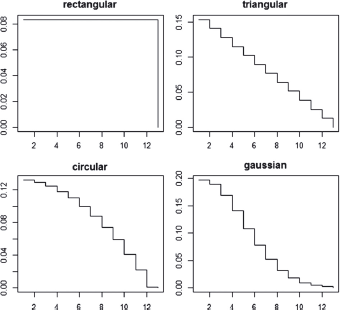